In [11]:
%matplotlib notebook
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os

organ = 'brain-tumor'
task = 'task02'
numOfSegs = 3

In [12]:
src = 'Data/training_data_v2/{}/Training/case{}'.format(organ, '08')

src_im = sitk.ReadImage(os.path.join(src, 'image.nii.gz'))
segs = []
for pth in os.listdir(src):
    if task in pth:
        im = sitk.ReadImage(os.path.join(src, pth))
        tmp = sitk.GetArrayFromImage(im)
        tmp.squeeze()
        segs.append(tmp)

<IPython.core.display.Javascript object>


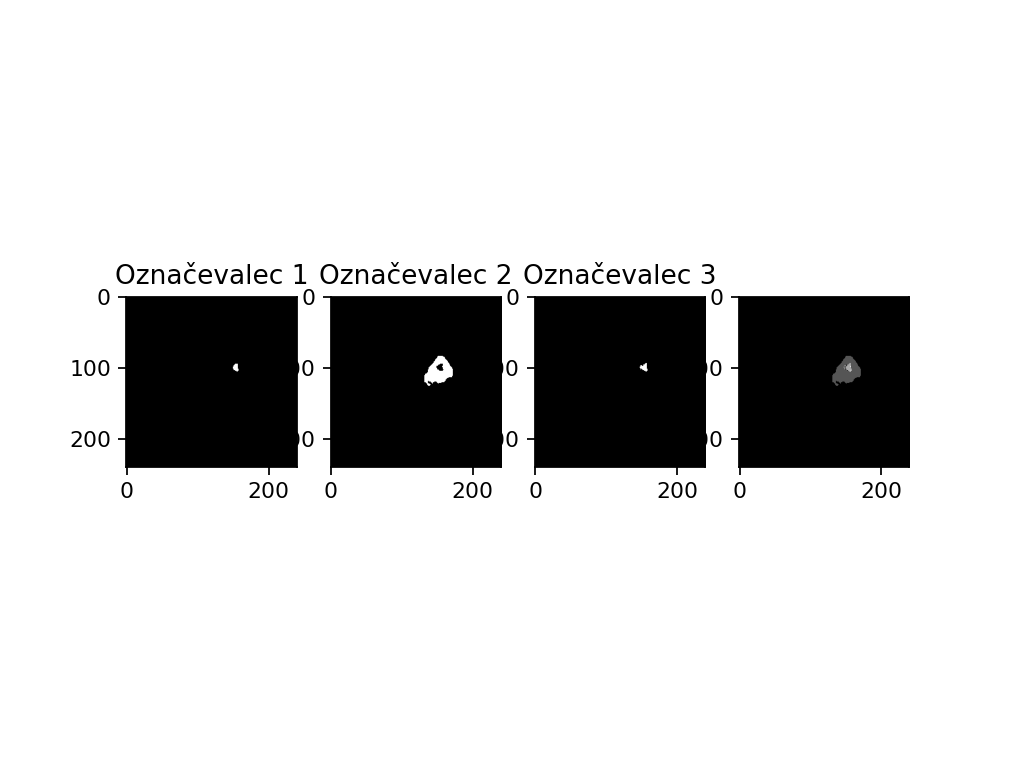

In [3]:
plt.figure()
for i in range(numOfSegs):
    plt.subplot(1, numOfSegs+1, i+1)
    plt.imshow(segs[i], cmap='gray')
    plt.title('Označevalec {}'.format(i+1))
plt.subplot(1, numOfSegs+1, numOfSegs+1)
plt.imshow(np.array(segs).sum(axis=0), cmap='gray')
plt.show()

<IPython.core.display.Javascript object>


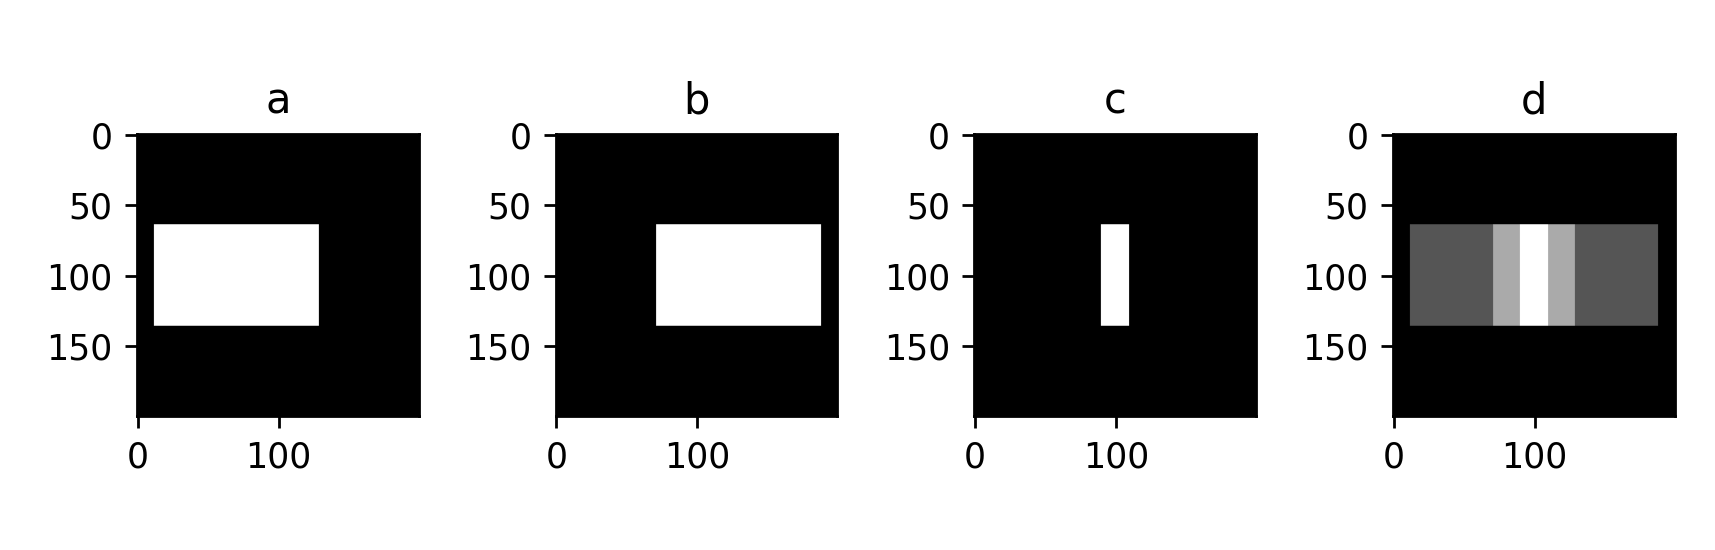

In [13]:
src = '/media/mzukovec/Data/Users/zukov/Documents/Faks/Semester 3/AMS/Clanek'
ims = []
labels = ['a', 'b', 'c', 'd']
for im in os.listdir(src):
    ims.append(sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(src, im))))
plt.figure()
for i in range(3):
    plt.subplot(1,4,i+1)
    plt.imshow(np.squeeze(ims[i])/255, cmap='gray')
    plt.title(labels[i])
plt.subplot(1,4,4)
plt.imshow(np.array(ims).squeeze().sum(axis=0)/255, cmap='gray')
plt.title('d')
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


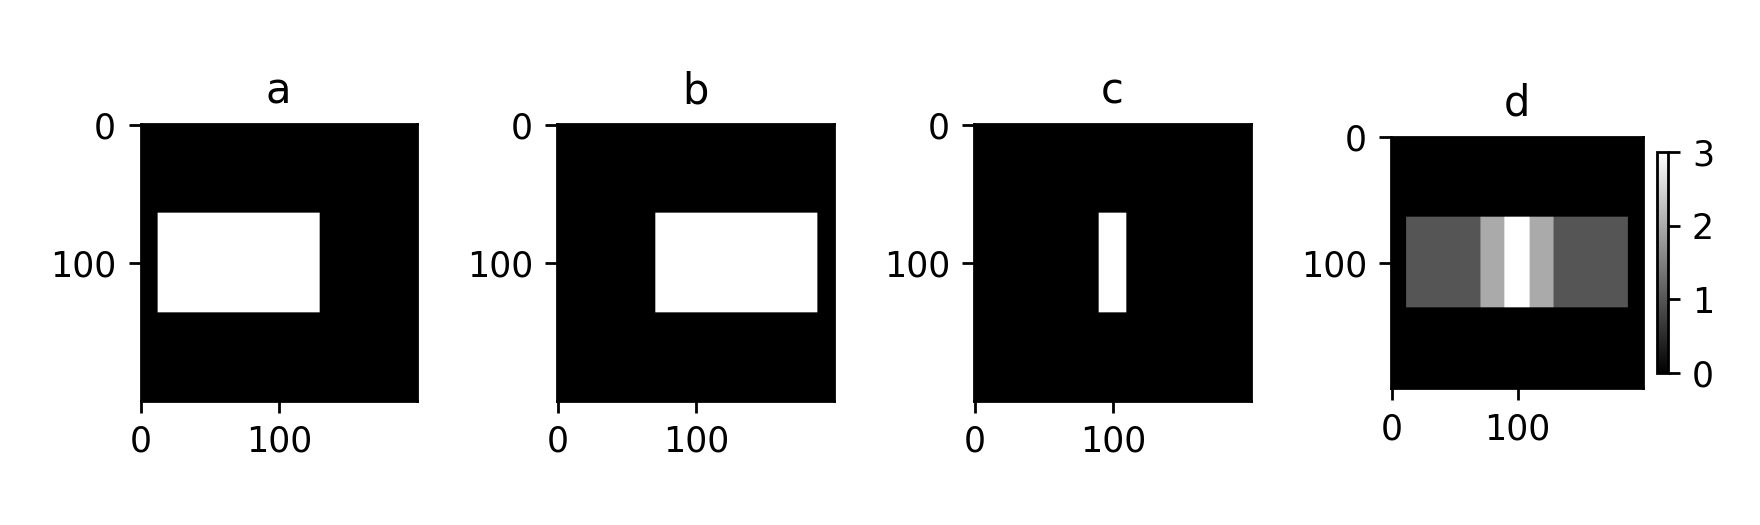

In [14]:
fig, axs = plt.subplots(1,4)
for i in range(3):
    axs[i].imshow(np.squeeze(ims[i])/255, cmap='gray')
    axs[i].set_title(labels[i])
im = axs[3].imshow(np.array(ims).squeeze().sum(axis=0)/255, cmap='gray')
axs[3].set_title('d')
fig.colorbar(im, ax=axs[3], fraction=0.04)
plt.tight_layout()

<IPython.core.display.Javascript object>


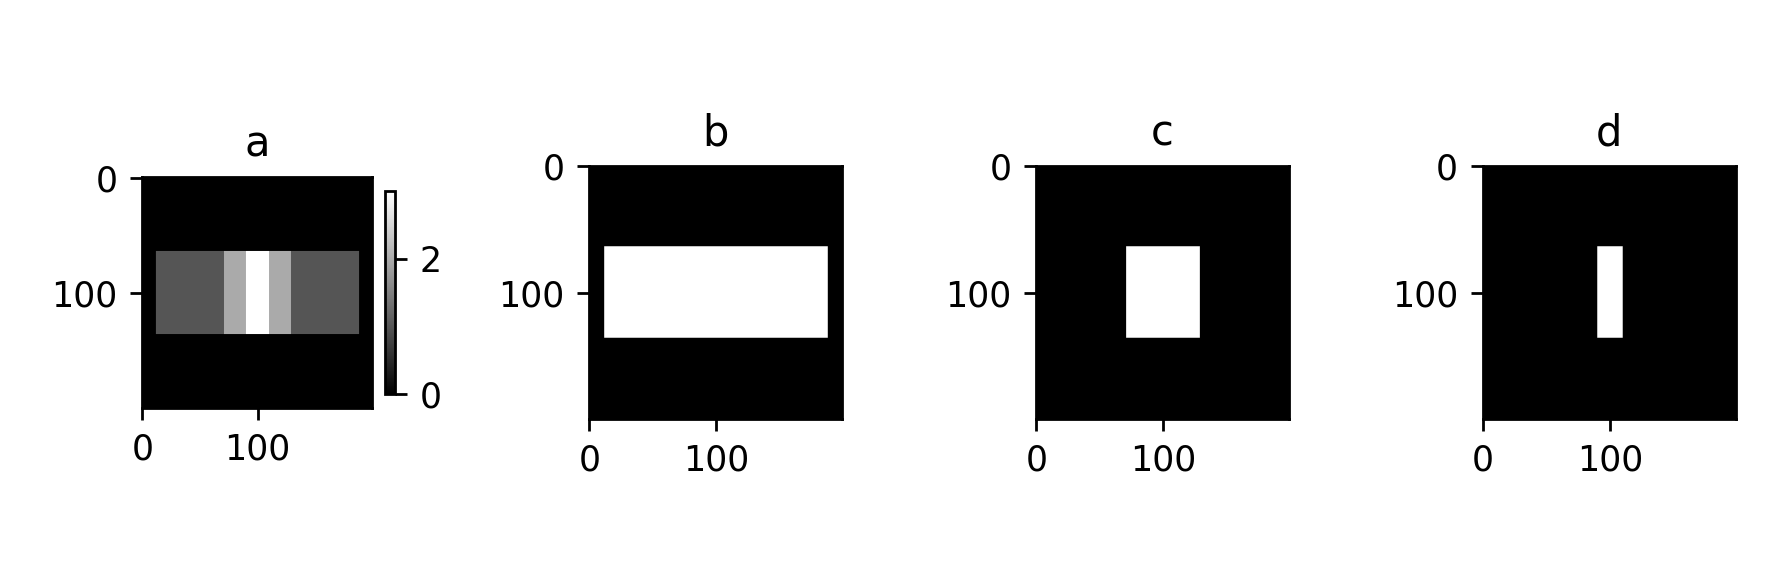

In [16]:
fig, axs = plt.subplots(1,4)
tmp = np.array(ims).squeeze().sum(axis=0)/255
im = axs[0].imshow(np.array(ims).squeeze().sum(axis=0)/255, cmap='gray')
fig.colorbar(im, ax=axs[0], fraction=0.04)
axs[0].set_title('a')
for i in range(1,4):
    axs[i].imshow(tmp>=i, cmap='gray')
    axs[i].set_title(labels[i])
plt.tight_layout()